In [25]:
#import libraries

import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from osgeo import gdal
from rasterio.plot import show
import os

print('*********** Libraries were imported successfuly **********')
print('working directory: '+ str(os.getcwd()))

*********** Libraries were imported successfuly **********
working directory: C:\Users\s79631\Documents\Python_ökoneu


**************** Loading classification file *************
**************** Image imported successfuly **************
**********************************************************
*********************** Image data ***********************
Number of bands: 1
Coordinate Reference System: PROJCS["unnamed",GEOGCS["ETRS 1989",DATUM["ETRS 1989",SPHEROID["GRS 1980",6378137,298.257222096042],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Image width:`901
Image height:`501
Number of Pixels:`451401
**********************************************************
************** extracting classification data ************
************ classification successfully loaded **********
Grassland/agr

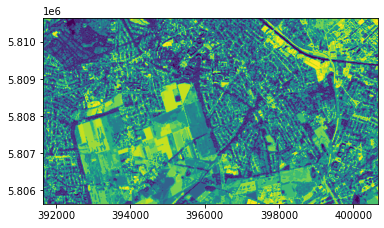

<AxesSubplot:>

In [26]:
#load classification image

print('**************** Loading classification file *************')
gdal.UseExceptions()
img_clas = rs.open ('20200928_sent_ökoneu_mask_etrs89.img')
print('**************** Image imported successfuly **************')

## Print image data
print('**********************************************************')
print('*********************** Image data ***********************')
print('Number of bands: ' + str(img_clas.count))
print('Coordinate Reference System: ' + str(img_clas.crs))
print('Image width:`' + str(img_clas.width))
print('Image height:`' + str(img_clas.height))
print('Number of Pixels:`' + str(int(img_clas.height)*int(img_clas.width)))
print('**********************************************************')

## create groups using mask values from ERDAS classification mask
grassland = [12,13,15,16,17,20,23,25,28,29,31,33]
water = [1]
tree_canopy = [3,5,6,7,8,9]
ISA = [2,4,10,11,14,18,19,21,22,24,26,27,30,32,34,35,36]

tree_list = list()
grass_list = list()
water_gate = list()
ISA_list = list()

## get bands
print('************** extracting classification data ************')
clas_values = img_clas.read(1)

seeker_column = 0
while seeker_column < img.width:
    seeker_row = 0
    while seeker_row < img.height:
        arr = clas_values[seeker_row]
        pos = (seeker_row,seeker_column)
        if arr[seeker_column] in grassland:
            grass_list.append(pos)
        if arr[seeker_column] in tree_canopy:
            tree_list.append(pos)
        if arr[seeker_column] in water:
            water_gate.append(pos)
        if arr[seeker_column] in ISA:
            ISA_list.append(pos)
        seeker_row = seeker_row+1
    seeker_column = seeker_column+1

print('************ classification successfully loaded **********')    
print('Grassland/agriculture values...................'+str(len(grass_list)))   
print('Tree Canopy values.............................'+str(len(tree_list))) 
print('Water values...................................'+str(len(water_gate))) 
print('Impervious Surface Area (ISA)..................'+str(len(ISA_list))) 
print('***********************************************************') 

## Check validity test = number of pixels
n_pix = int(img_clas.height)*int(img_clas.width)
test = int(len(grass_list))+ int(len(tree_list))+int(len(water_gate))+int(len(ISA_list))
if test == n_pix:
    print("Validity test: TRUE")
else:
    print("Validit Test: FALSE")


print(grass_list[1])
#print((clas_values[200]))
#print(type(clas_values[1]))
#x = clas_values[200] #x = classvalues [row]
#print (x[1]) #value x[column]

#for elementa in (clas_values [200]):
    #if elementa in grassland:
        #print("V")
    #else:
       #print("F")

show(img_clas)

**************** Image imported successfuly **************
**********************************************************
*********************** Image data ***********************
Number of bands: 1
Coordinate Reference System: PROJCS["unnamed",GEOGCS["ETRS 1989",DATUM["ETRS 1989",SPHEROID["GRS 1980",6378137,298.257222096042],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Image width:`901
Image height:`501
Number of Pixels:`451401
**********************************************************


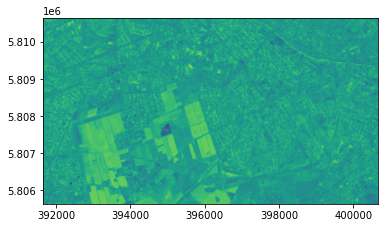

501


In [89]:
##Change directory to file folder
##os.chdir('D:\TEMP\20200324_Sentinel2A')

## open image

gdal.UseExceptions()
img = rs.open ('20201219_sent_Ökoneu_ndii.img')

print('**************** Image imported successfuly **************')

## Print image data
print('**********************************************************')
print('*********************** Image data ***********************')
print('Number of bands: ' + str(img.count))
print('Coordinate Reference System: ' + str(img.crs))
print('Image width:`' + str(img.width))
print('Image height:`' + str(img.height))
print('Number of Pixels:`' + str(int(img.height)*int(img.width)))
print('**********************************************************')
show(img)

## get bands
Index_Values = img.read(1)
print(len(Index_Values))

## stats
from scipy import stats
#stats.describe (Index_Values) #activate just if needed

**********************************************************
****************** Analysing values... *******************
**********************************************************
******************** Analysis completed *******************
**********************************************************
****************Scene analysis results *******************
Scene NDII [0.25-1]...................... 106106 pixels
Scene NDII [0.2, 0.25]................... 44616 pixels
Scene NDII [0.15-0.2..................... 54728 pixels
Scene NDII [0.1-0.15..................... 60645 pixels
Scene NDII [0.05-0.1].................... 58804 pixels
Scene NDII [-0.01-0.05].................. 103835 pixels
Scene NDII [<-0.1]....................... 22667 pixels
**********************************************************
Mean NDII ............................... 0.1430406
**********************************************************
Total  area ............................. 4514.01 hectareas
****************************

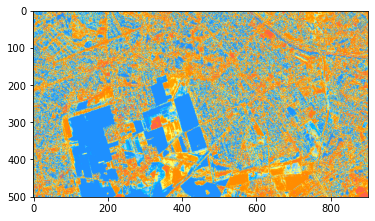

In [90]:
print('**********************************************************')
print('****************** Analysing values... *******************')
print('**********************************************************')

## create classification conters and indexing lists 

NDII_DB = 0 # values between [0.25-1] (Dark Blue) (30,144,255)
NDII_DB_dic = list()

NDII_MB = 0 # values between [0.2-0.25] (Medium Blue) (0,191,255)
NDII_MB_dic = list()

NDII_LB = 0 # values between [0.15-0.2] (light Blue) (135,206,250)
NDII_LB_dic = list()

NDII_YEL = 0 # values between [0.1-0.15] (Yellow) (255,255,102)
NDII_YEL_dic = list()

NDII_OL = 0 # values between [0.05-0.1] (Orange light) (255,165,0)
NDII_OL_dic = list()

NDII_OD = 0 # values between [-0.1 -0.05] (ORANGE Dark) (255,140,0)
NDII_OD_dic = list()

NDII_RED = 0 # values between [<-0.1] (RED)  (255,99,71)
NDII_RED_dic = list()

# create numpy-array for masking for report

output_format = ".png"
t=(img.height, img.width,3)
mask=np.zeros(t,dtype=np.uint8)

#Define Masking Colours

colors= [(255,99,71),(255,140,0),(255,165,0),(255,255,102),(135,206,250),(0,191,255),(30,144,255)]

# Classify Pixels
NDII_tree=list()
NDII_veg=list()
NDII_grass=list()
NDII_ISA=list()
NDII_water=list()

NDII_accum = list()

counter_total= 0

seeker_column = 0
while seeker_column < img.width:
    seeker_row = 0
    while seeker_row < img.height:
        
        if Index_Values[seeker_row, seeker_column] <= -0.1:
            mask[seeker_row, seeker_column] = colors[0]
            NDII_RED = NDII_RED +1
        else:
            if Index_Values[seeker_row, seeker_column] <= 0.05:
                mask[seeker_row, seeker_column] = colors[1]
                NDII_OD = NDII_OD+1
            else:
                if Index_Values[seeker_row, seeker_column] <= 0.1:
                    mask[seeker_row, seeker_column] = colors[2]
                    NDII_OL = NDII_OL + 1
                else:
                    if Index_Values[seeker_row, seeker_column] <= 0.15:
                        mask[seeker_row, seeker_column] = colors[3]
                        NDII_YEL = NDII_YEL + 1
                    else:
                        if Index_Values[seeker_row, seeker_column] <= 0.2:
                            mask[seeker_row, seeker_column] = colors[4]
                            NDII_LB = NDII_LB + 1
                        else:
                            if Index_Values[seeker_row, seeker_column] <= 0.25:
                                mask[seeker_row, seeker_column] = colors[5]
                                NDII_MB = NDII_MB + 1
                            else:
                                mask[seeker_row, seeker_column] = colors[6]
                                NDII_DB = NDII_DB + 1
                                
        NDII_accum.append(Index_Values[seeker_row, seeker_column])
        seeker_row = seeker_row+1
    seeker_column = seeker_column+1


for elements in tree_list:
    x_pos = elements[0] 
    y_pos = elements[1]
    value = float(Index_Values[x_pos, y_pos])
    NDII_tree.append(value)
    NDII_veg.append(value)
    
for elements in grass_list:
    x_pos = elements[0] 
    y_pos = elements[1]
    value = float(Index_Values[x_pos, y_pos])
    NDII_grass.append(value)
    NDII_veg.append(value)

for elements in ISA_list:
    x_pos = elements[0] 
    y_pos = elements[1]
    value = float(Index_Values[x_pos, y_pos])
    NDII_ISA.append(value)

for elements in water_gate:
    x_pos = elements[0] 
    y_pos = elements[1]
    value = float(Index_Values[x_pos, y_pos])
    NDII_water.append(value)

#Calculation of vegeation area and non vegetation area

#tree_list = list() len(NDII_veg)


total_area = int(len(NDII_accum))*10*10/10000

NDII_treemean = np.nanmean(NDII_tree)
NDII_grassmean = np.nanmean(NDII_grass)
NDII_watermean = np.nanmean(NDII_water)
NDII_ISAmean = np.nanmean(NDII_ISA)
NDII_vegmean = np.nanmean(NDII_veg)

NDII_scene = np.nanmean(NDII_accum)


print('******************** Analysis completed *******************')
print('**********************************************************')
print('****************Scene analysis results *******************')
print('Scene NDII [0.25-1]...................... ' + str(NDII_DB) + " pixels")
print('Scene NDII [0.2, 0.25]................... ' + str(NDII_MB) + " pixels")
print('Scene NDII [0.15-0.2..................... ' + str(NDII_LB) + " pixels")
print('Scene NDII [0.1-0.15..................... ' + str(NDII_YEL) + " pixels")
print('Scene NDII [0.05-0.1].................... ' + str(NDII_OL) + " pixels")
print('Scene NDII [-0.01-0.05].................. ' + str(NDII_OD) + " pixels")
print('Scene NDII [<-0.1]....................... ' + str(NDII_RED) + " pixels")
print('**********************************************************')
print('Mean NDII ............................... ' + str(NDII_scene))
print('**********************************************************')
print('Total  area ............................. ' + str(float(total_area)) + " hectareas")
print('**********************************************************')
print('                                                          ')

# vegetation analysis

print('**********************************************************')
print('********** Starting Land Cover NDII Analysis *************')
print('**********************************************************')


grass_area = int(len(grass_list))*10*10/10000
tree_area = int(len(tree_list))*10*10/10000
veg_area = 10*10/10000*(int(len(NDII_veg)))
water_area = int(len(water_gate))*10*10/10000
ISA_area = int(len(ISA_list))*10*10/10000


# Values for NDII tree canopy

counter_1= 0
counter_2= 0
counter_3= 0
counter_4= 0
counter_5= 0
counter_6= 0
counter_7= 0

for elements in NDII_tree:
    if elements <= -0.1:
        counter_1 = counter_1+1
    else:
        if elements <= 0.05:
            counter_2 = counter_2+1
        else:
            if elements <= 0.10:
                counter_3 = counter_3 + 1
            else:
                if elements <= 0.15:
                    counter_4 = counter_4 + 1
                else:
                    if elements <= 0.2:
                        counter_5 = counter_5 + 1
                    else:
                        if elements <= 0.25:
                            counter_6 = counter_6 + 1
                        else:
                            counter_7 = counter_7 + 1
                            
print('**********    Tree canopy NDII Results    ****************')
print('Tree canopy NDII [>0.25]....................... ' + str(counter_7) + " pixels")
print('Tree canopy NDII [0.2, 0.25]................... ' + str(counter_6) + " pixels")
print('Tree canopy NDII [0.15-0.20]................... ' + str(counter_5) + " pixels")
print('Tree canopy NDII [0.10-0.15]................... ' + str(counter_4) + " pixels")
print('Tree canopy NDII [0.05-0.10]................... ' + str(counter_3) + " pixels")
print('Tree canopy NDII [-0.1-0.05]................... ' + str(counter_2) + " pixels")
print('Tree canopy NDII [<-0.1]....................... ' + str(counter_1) + " pixels")
print('**********************************************************')
print('Tree canopy area .............................. ' + str(tree_area) + " hectareas")
print('**********************************************************')
print('                                                          ')

# Values for NDII grassland


counter_1= 0
counter_2= 0
counter_3= 0
counter_4= 0
counter_5= 0
counter_6= 0
counter_7= 0

for elements in NDII_grass:
    if elements <= -0.1:
        counter_1 = counter_1+1
    else:
        if elements <= 0.05:
            counter_2 = counter_2+1
        else:
            if elements <= 0.10:
                counter_3 = counter_3 + 1
            else:
                if elements <= 0.15:
                    counter_4 = counter_4 + 1
                else:
                    if elements <= 0.2:
                        counter_5 = counter_5 + 1
                    else:
                        if elements <= 0.25:
                            counter_6 = counter_6 + 1
                        else:
                            counter_7 = counter_7 + 1
                            
print('********  Grass/Agriculture Land NDII Results    *********')
print('Grass NDII [>0.25]............................. ' + str(counter_7) + " pixels")
print('Grass NDII [0.2, 0.25]......................... ' + str(counter_6) + " pixels")
print('Grass NDII [0.15-0.20]......................... ' + str(counter_5) + " pixels")
print('Grass NDII [0.10-0.15]......................... ' + str(counter_4) + " pixels")
print('Grass NDII [0.05-0.10]......................... ' + str(counter_3) + " pixels")
print('Grass NDII [-0.1-0.05]......................... ' + str(counter_2) + " pixels")
print('Grass NDII [<-0.1]............................. ' + str(counter_1) + " pixels")
print('**********************************************************')
print('Grass Analysed area............................ ' + str(grass_area) + " hectareas")
print('**********************************************************')
print('                                                          ')

# Values for NDII Vegetation

print('********** Vegetation Analysis Results *******************')
print('**********************************************************')
print('Mean Grassland NDII............................' + str(NDII_grassmean))
print('Mean Tree Canopy NDII .........................' + str(NDII_treemean))
print('Mean Vegetation NDII...........................' + str(NDII_vegmean))
print('**********************************************************')
print('Total Analysed vegetation area ........... ' + str(veg_area) + " hectareas")
print('                                                          ')

# Values for NDII ISA


counter_1= 0
counter_2= 0
counter_3= 0
counter_4= 0
counter_5= 0
counter_6= 0
counter_7= 0

for elements in NDII_ISA:
    if elements <= -0.1:
        counter_1 = counter_1+1
    else:
        if elements <= 0.05:
            counter_2 = counter_2+1
        else:
            if elements <= 0.10:
                counter_3 = counter_3 + 1
            else:
                if elements <= 0.15:
                    counter_4 = counter_4 + 1
                else:
                    if elements <= 0.2:
                        counter_5 = counter_5 + 1
                    else:
                        if elements <= 0.25:
                            counter_6 = counter_6 + 1
                        else:
                            counter_7 = counter_7 + 1
                            
print('***************    ISA NDII Results    *******************')
print('ISA NDII [>0.25]............................... ' + str(counter_7) + " pixels")
print('ISA NDII [0.2, 0.25]........................... ' + str(counter_6) + " pixels")
print('ISA NDII [0.15-0.20]........................... ' + str(counter_5) + " pixels")
print('ISA NDII [0.10-0.15]........................... ' + str(counter_4) + " pixels")
print('ISA NDII [0.05-0.10]........................... ' + str(counter_3) + " pixels")
print('ISA NDII [-0.1-0.05]........................... ' + str(counter_2) + " pixels")
print('ISA NDII [<-0.1]............................... ' + str(counter_1) + " pixels")
print('**********************************************************')
print('ISA Analysed area.............................. ' + str(ISA_area) + " hectareas")
print('Mean ISA NDII..................................' + str(NDII_ISAmean))
print('**********************************************************')
print('                                                          ')

print('Mean water NDII..................................' + str(NDII_watermean))

# Values for NDII water


counter_1= 0
counter_2= 0
counter_3= 0
counter_4= 0
counter_5= 0
counter_6= 0
counter_7= 0

for elements in NDII_water:
    if elements <= -0.1:
        counter_1 = counter_1+1
    else:
        if elements <= 0.05:
            counter_2 = counter_2+1
        else:
            if elements <= 0.10:
                counter_3 = counter_3 + 1
            else:
                if elements <= 0.15:
                    counter_4 = counter_4 + 1
                else:
                    if elements <= 0.2:
                        counter_5 = counter_5 + 1
                    else:
                        if elements <= 0.25:
                            counter_6 = counter_6 + 1
                        else:
                            counter_7 = counter_7 + 1
                            
print('***************    Water NDII Results    *****************')
print('Water NDII [>0.25]............................. ' + str(counter_7) + " pixels")
print('Water NDII [0.2, 0.25]......................... ' + str(counter_6) + " pixels")
print('Water NDII [0.15-0.20]......................... ' + str(counter_5) + " pixels")
print('Water NDII [0.10-0.15]......................... ' + str(counter_4) + " pixels")
print('Water NDII [0.05-0.10]......................... ' + str(counter_3) + " pixels")
print('Water NDII [-0.1-0.05]......................... ' + str(counter_2) + " pixels")
print('Water NDII [<-0.1]............................. ' + str(counter_1) + " pixels")
print('**********************************************************')
print('Water Analysed area............................ ' + str(water_area) + " hectareas")
print('Mean water NDII..................................' + str(NDII_watermean))
print('**********************************************************')
print('                                                          ')

# Plot mask

mask_plot = Image.fromarray(mask, 'RGB')
#mask_plot.save('20201219_Ökoneu_NDII_mask.png')
plt.imshow(mask_plot)